In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette('husl')

# Load data
df = pd.read_csv('../data/patient_readmission_data.csv')
print(f"Dataset shape: {df.shape}")
df.head()


Dataset shape: (20, 12)


,PatientID,Age,Gender,Diagnosis,LengthOfStay,NumberOfProcedures,NumberOfMedications,NumberOfDiagnoses,PriorAdmissions,InsuranceType,DischargeDisposition,Readmitted
0,1,65,Male,Diabetes,9,2,8,3,1,Private,Home,No
1,2,72,Female,CHF,10,3,12,4,2,Medicare,Home,Yes
2,3,58,Male,COPD,6,1,6,2,0,Private,Home,No
3,4,80,Female,Stroke,10,4,15,5,3,Medicare,SNF,Yes
4,5,50,Male,Diabetes,6,1,7,2,0,Private,Home,No


In [38]:
# Basic statistics
print("Dataset Information:")
print(df.info())
print("\nBasic Statistics:")
df.describe()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PatientID             20 non-null     int64 
 1   Age                   20 non-null     int64 
 2   Gender                20 non-null     object
 3   Diagnosis             20 non-null     object
 4   LengthOfStay          20 non-null     int64 
 5   NumberOfProcedures    20 non-null     int64 
 6   NumberOfMedications   20 non-null     int64 
 7   NumberOfDiagnoses     20 non-null     int64 
 8   PriorAdmissions       20 non-null     int64 
 9   InsuranceType         20 non-null     object
 10  DischargeDisposition  20 non-null     object
 11  Readmitted            20 non-null     object
dtypes: int64(7), object(5)
memory usage: 2.0+ KB
None

Basic Statistics:


,PatientID,Age,LengthOfStay,NumberOfProcedures,NumberOfMedications,NumberOfDiagnoses,PriorAdmissions
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,10.50000,65.450000,8.850000,2.400000,10.550000,3.450000,1.350000
std,5.91608,11.736022,2.739093,1.231174,4.406634,1.276302,1.225819
min,1.00000,45.000000,5.000000,1.000000,5.000000,2.000000,0.000000
25%,5.75000,57.250000,6.000000,1.000000,6.750000,2.000000,0.000000
50%,10.50000,66.000000,9.000000,2.000000,10.000000,3.000000,1.000000
75%,15.25000,74.250000,10.000000,3.000000,13.250000,4.250000,2.000000
max,20.00000,85.000000,15.000000,5.000000,20.000000,6.000000,4.000000


Readmission Rate:
Readmitted
No      0.60
Yes     0.35
Yes     0.05
Name: proportion, dtype: float64


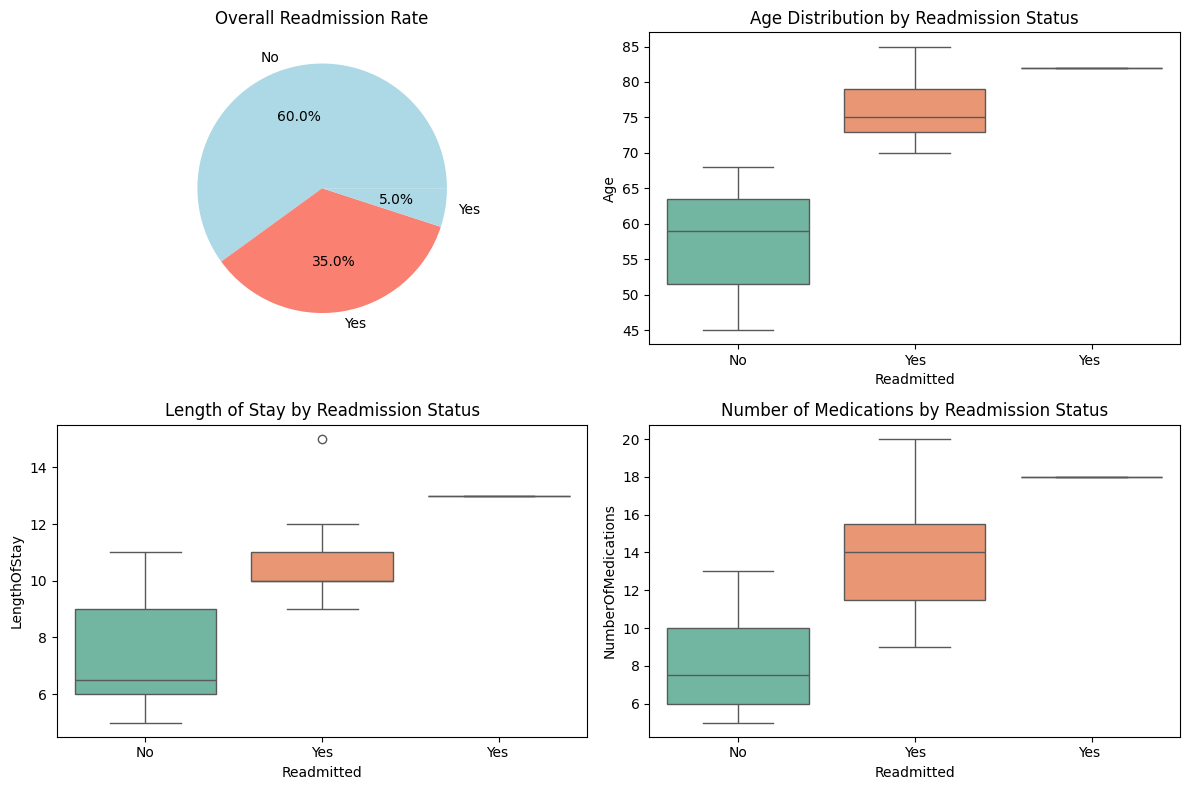

In [39]:
# Readmission rate
readmission_rate = df['Readmitted'].value_counts(normalize=True)
print("Readmission Rate:")
print(readmission_rate)

plt.figure(figsize=(12,8))

# Readmission rate pie chart
plt.subplot(2, 2, 1)
readmission_rate.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'salmon'])
plt.title('Overall Readmission Rate')
plt.ylabel('')

# Age distribution by readmission
plt.subplot(2, 2, 2)
sns.boxplot(x='Readmitted', y='Age', data=df, hue='Readmitted', palette='Set2', legend=False)
plt.title('Age Distribution by Readmission Status')

# Length of stay by readmission
plt.subplot(2, 2, 3)
sns.boxplot(x='Readmitted', y='LengthOfStay', data=df, hue='Readmitted', palette='Set2', legend=False)
plt.title('Length of Stay by Readmission Status')

# Number of medications by readmission
plt.subplot(2, 2, 4)
sns.boxplot(x='Readmitted', y='NumberOfMedications', data=df, hue='Readmitted', palette='Set2', legend=False)
plt.title('Number of Medications by Readmission Status')

plt.tight_layout()
plt.show()


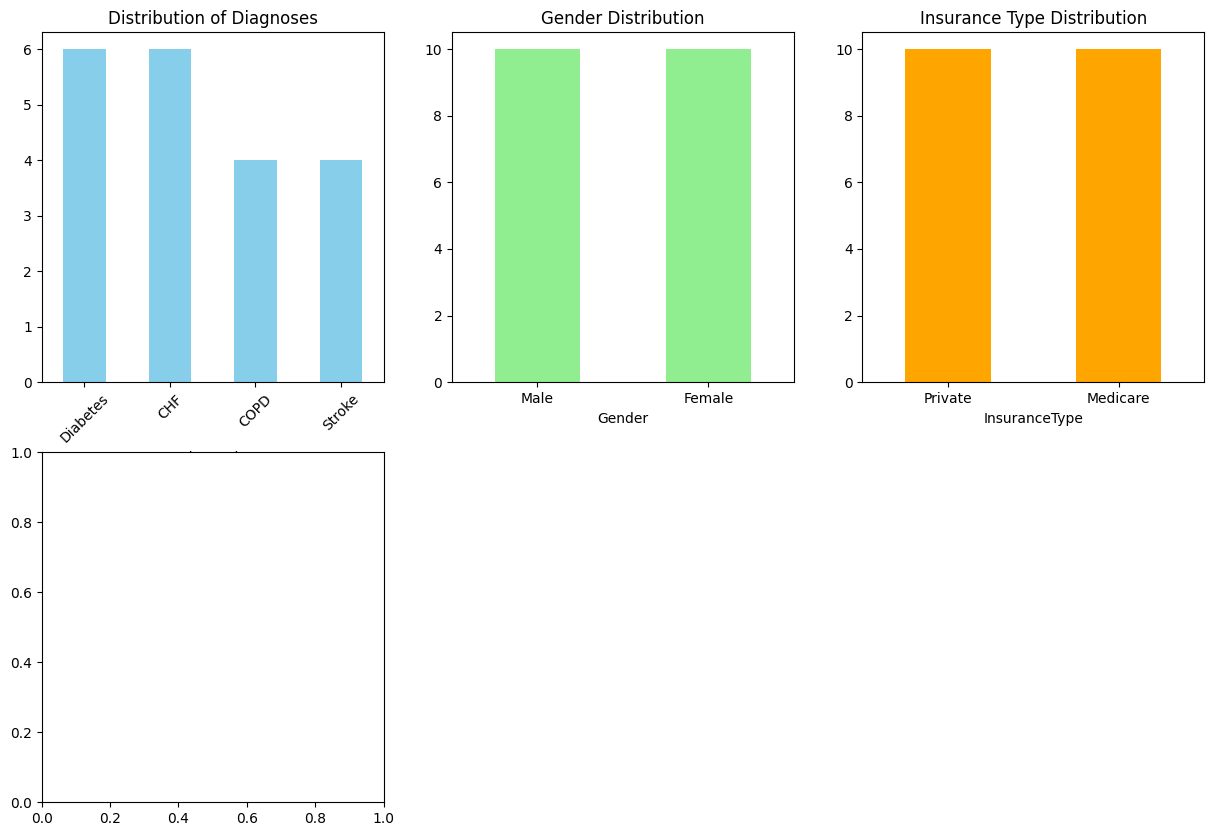

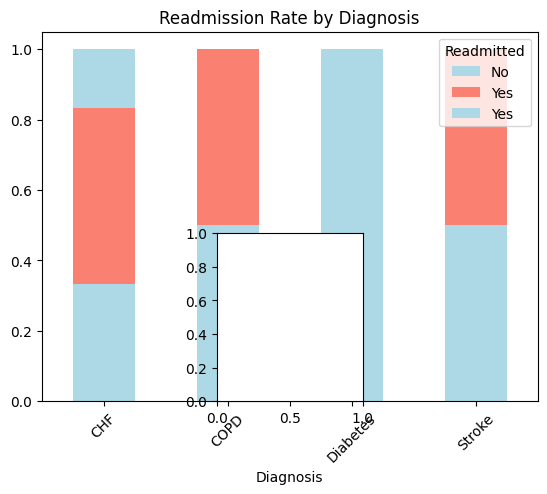

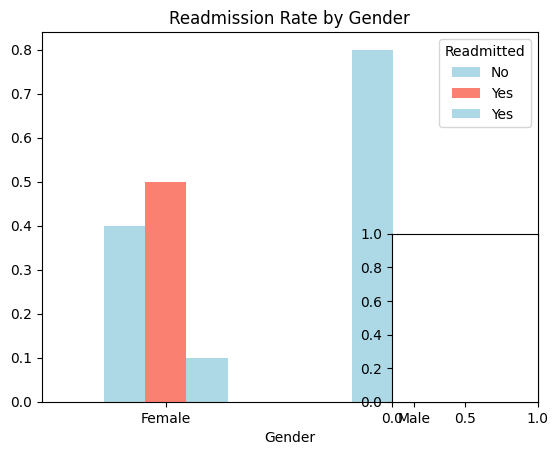

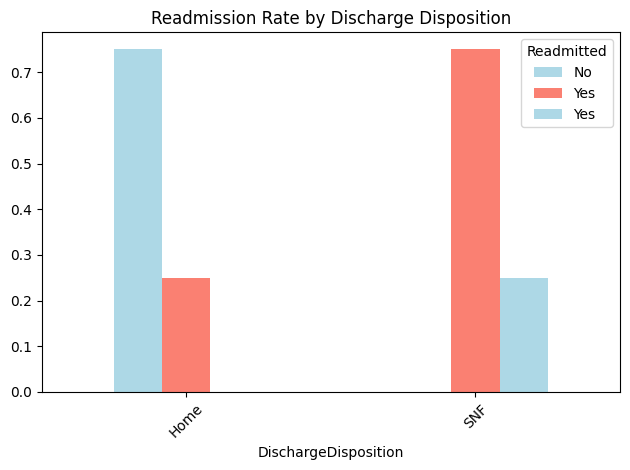

In [40]:
# Categorical variable analysis
plt.figure(figsize=(15,10))

# Diagnosis distribution
plt.subplot(2, 3, 1)
diagnosis_counts = df['Diagnosis'].value_counts()
diagnosis_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Diagnoses')
plt.xticks(rotation=45)

# Gender distribution
plt.subplot(2, 3, 2)
gender_counts = df['Gender'].value_counts()
gender_counts.plot(kind='bar', color='lightgreen')
plt.title('Gender Distribution')
plt.xticks(rotation=0)

# Insurance type
plt.subplot(2, 3, 3)
insurance_counts = df['InsuranceType'].value_counts()
insurance_counts.plot(kind='bar', color='orange')
plt.title('Insurance Type Distribution')
plt.xticks(rotation=0)

# Readmission by diagnosis
plt.subplot(2, 3, 4)
readmit_by_diagnosis = pd.crosstab(df['Diagnosis'], df['Readmitted'], normalize='index')
readmit_by_diagnosis.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])
plt.title('Readmission Rate by Diagnosis')
plt.xticks(rotation=45)
plt.legend(title='Readmitted')

# Readmission by gender
plt.subplot(2, 3, 5)
readmit_by_gender = pd.crosstab(df['Gender'], df['Readmitted'], normalize='index')
readmit_by_gender.plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Readmission Rate by Gender')
plt.xticks(rotation=0)
plt.legend(title='Readmitted')

# Readmission by discharge disposition
plt.subplot(2, 3, 6)
readmit_by_discharge = pd.crosstab(df['DischargeDisposition'], df['Readmitted'], normalize='index')
readmit_by_discharge.plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Readmission Rate by Discharge Disposition')
plt.xticks(rotation=45)
plt.legend(title='Readmitted')

plt.tight_layout()
plt.show()


In [41]:
# Encode categorical variables
le_gender = LabelEncoder()
le_diagnosis = LabelEncoder()
le_insurance = LabelEncoder()
le_discharge = LabelEncoder()

X = df.copy()
X['Gender'] = le_gender.fit_transform(X['Gender'])
X['Diagnosis'] = le_diagnosis.fit_transform(X['Diagnosis'])
X['InsuranceType'] = le_insurance.fit_transform(X['InsuranceType'])
X['DischargeDisposition'] = le_discharge.fit_transform(X['DischargeDisposition'])

# Create target variable
y = (X['Readmitted'] == 'Yes').astype(int)

# Drop non-feature columns
X = X.drop(['PatientID', 'Readmitted'], axis=1)

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns: {list(X.columns)}")
print(f"\nTarget distribution:")
print(y.value_counts())


Features shape: (20, 10)
Target shape: (20,)

Feature columns: ['Age', 'Gender', 'Diagnosis', 'LengthOfStay', 'NumberOfProcedures', 'NumberOfMedications', 'NumberOfDiagnoses', 'PriorAdmissions', 'InsuranceType', 'DischargeDisposition']

Target distribution:
Readmitted
0    13
1     7
Name: count, dtype: int64


In [42]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"\nTraining set class distribution:")
print(y_train.value_counts(normalize=True))
print(f"\nTest set class distribution:")
print(y_test.value_counts(normalize=True))


Training set: (16, 10)
Test set: (4, 10)

Training set class distribution:
Readmitted
0    0.625
1    0.375
Name: proportion, dtype: float64

Test set class distribution:
Readmitted
0    0.75
1    0.25
Name: proportion, dtype: float64


In [43]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

print("Model Performance:")
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.3f}")


Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

ROC AUC Score: 1.000


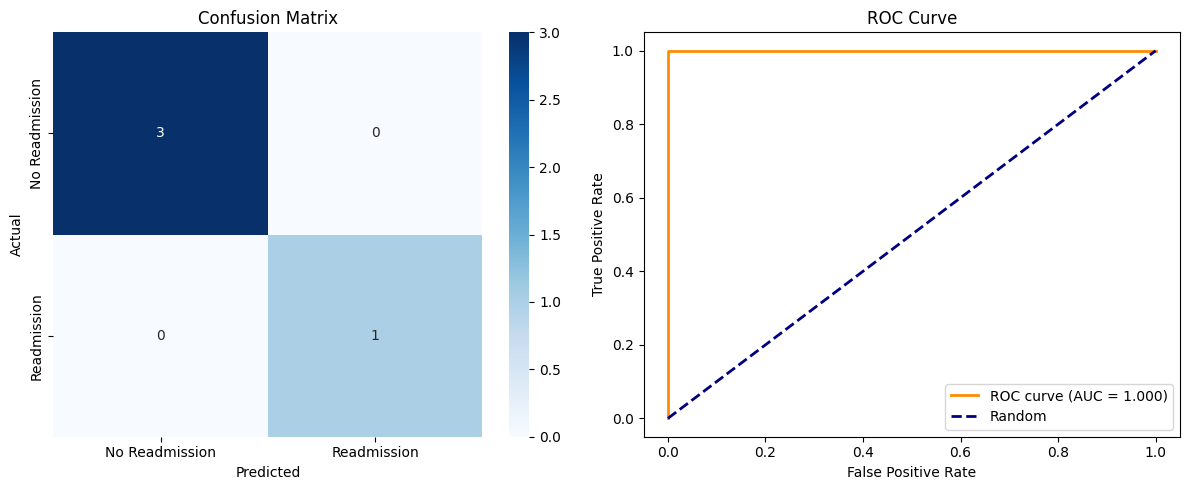

In [44]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Readmission', 'Readmission'],
            yticklabels=['No Readmission', 'Readmission'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# ROC Curve
plt.subplot(1, 2, 2)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_score(y_test, y_pred_proba):.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.tight_layout()
plt.show()


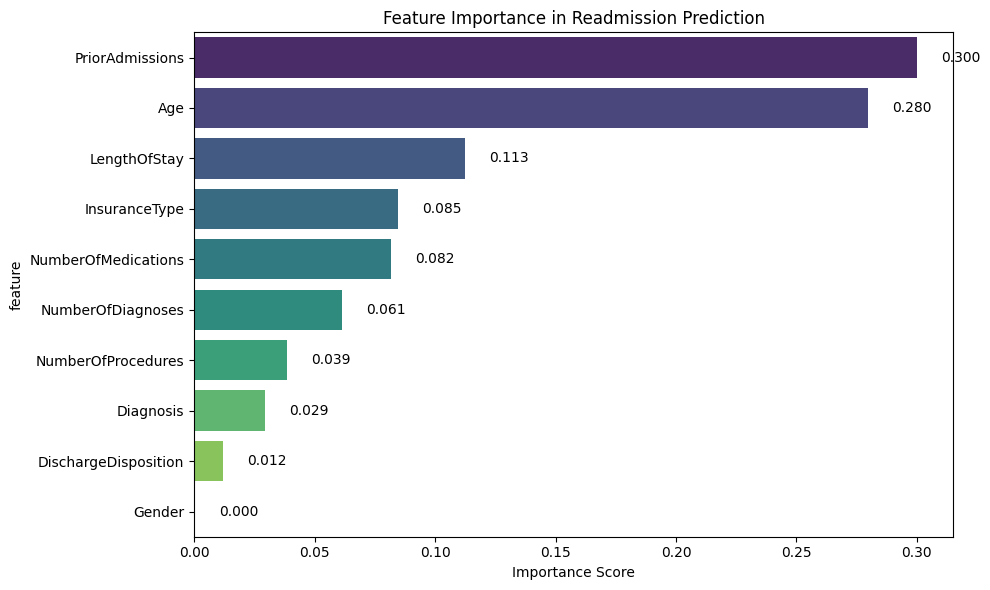

Top 5 Most Important Features:
               feature  importance
7      PriorAdmissions    0.299958
0                  Age    0.279609
3         LengthOfStay    0.112563
8        InsuranceType    0.084552
5  NumberOfMedications    0.081691


In [45]:
# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance in Readmission Prediction')
plt.xlabel('Importance Score')

# Add value labels
for i, v in enumerate(feature_importance['importance']):
    plt.text(v + 0.01, i, f'{v:.3f}', va='center')

plt.tight_layout()
plt.show()

print("Top 5 Most Important Features:")
print(feature_importance.head())


In [46]:
# Bias analysis across demographic groups
test_df = X_test.copy()
test_df['Actual'] = y_test
test_df['Predicted'] = y_pred
test_df['Age_Original'] = df.iloc[X_test.index]['Age'].values
test_df['Gender_Original'] = df.iloc[X_test.index]['Gender'].values
test_df['Insurance_Original'] = df.iloc[X_test.index]['InsuranceType'].values

print("BIAS ANALYSIS REPORT")
print("="*50)

# Age bias analysis
age_groups = pd.cut(test_df['Age_Original'], bins=[0, 65, 80, 100], labels=['<65', '65-80', '>80'])
test_df['AgeGroup'] = age_groups

age_performance = []
for age_group in age_groups.unique():
    if pd.isna(age_group):
        continue
    mask = test_df['AgeGroup'] == age_group
    if mask.sum() > 0:
        accuracy = (test_df[mask]['Actual'] == test_df[mask]['Predicted']).mean()
        precision = test_df[mask]['Predicted'].sum() / mask.sum() if mask.sum() > 0 else 0
        age_performance.append({'AgeGroup': age_group, 'Accuracy': accuracy, 'SampleSize': mask.sum()})

age_perf_df = pd.DataFrame(age_performance)
print("\nPerformance by Age Group:")
print(age_perf_df)

# Gender bias analysis
gender_performance = []
for gender in test_df['Gender_Original'].unique():
    mask = test_df['Gender_Original'] == gender
    if mask.sum() > 0:
        accuracy = (test_df[mask]['Actual'] == test_df[mask]['Predicted']).mean()
        gender_performance.append({'Gender': gender, 'Accuracy': accuracy, 'SampleSize': mask.sum()})

gender_perf_df = pd.DataFrame(gender_performance)
print("\nPerformance by Gender:")
print(gender_perf_df)

# Insurance bias analysis
insurance_performance = []
for insurance in test_df['Insurance_Original'].unique():
    mask = test_df['Insurance_Original'] == insurance
    if mask.sum() > 0:
        accuracy = (test_df[mask]['Actual'] == test_df[mask]['Predicted']).mean()
        insurance_performance.append({'Insurance': insurance, 'Accuracy': accuracy, 'SampleSize': mask.sum()})

insurance_perf_df = pd.DataFrame(insurance_performance)
print("\nPerformance by Insurance Type:")
print(insurance_perf_df)


BIAS ANALYSIS REPORT

Performance by Age Group:
  AgeGroup  Accuracy  SampleSize
0      <65       1.0           2
1    65-80       1.0           2

Performance by Gender:
   Gender  Accuracy  SampleSize
0  Female       1.0           2
1    Male       1.0           2

Performance by Insurance Type:
  Insurance  Accuracy  SampleSize
0   Private       1.0           2
1  Medicare       1.0           2


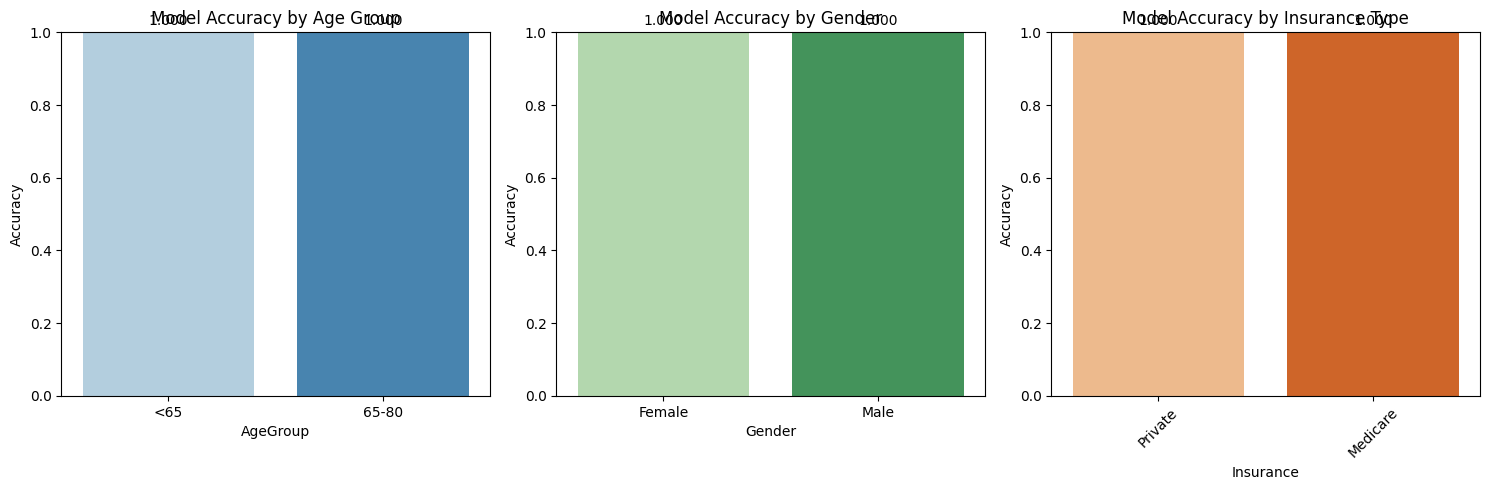

In [47]:
# Visualize bias analysis results
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
if len(age_perf_df) > 0:
    sns.barplot(x='AgeGroup', y='Accuracy', data=age_perf_df, palette='Blues')
    plt.title('Model Accuracy by Age Group')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    # Add value labels
    for i, v in enumerate(age_perf_df['Accuracy']):
        plt.text(i, v + 0.02, f'{v:.3f}', ha='center')

plt.subplot(1, 3, 2)
if len(gender_perf_df) > 0:
    sns.barplot(x='Gender', y='Accuracy', data=gender_perf_df, palette='Greens')
    plt.title('Model Accuracy by Gender')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    # Add value labels
    for i, v in enumerate(gender_perf_df['Accuracy']):
        plt.text(i, v + 0.02, f'{v:.3f}', ha='center')

plt.subplot(1, 3, 3)
if len(insurance_perf_df) > 0:
    sns.barplot(x='Insurance', y='Accuracy', data=insurance_perf_df, palette='Oranges')
    plt.title('Model Accuracy by Insurance Type')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    # Add value labels
    for i, v in enumerate(insurance_perf_df['Accuracy']):
        plt.text(i, v + 0.02, f'{v:.3f}', ha='center')

plt.tight_layout()
plt.show()


In [48]:
# Create risk categories based on predicted probabilities
test_results = pd.DataFrame({
    'PatientID': df.iloc[X_test.index]['PatientID'].values,
    'Age': df.iloc[X_test.index]['Age'].values,
    'Gender': df.iloc[X_test.index]['Gender'].values,
    'Diagnosis': df.iloc[X_test.index]['Diagnosis'].values,
    'Actual_Readmission': y_test.values,
    'Predicted_Probability': y_pred_proba,
    'Predicted_Readmission': y_pred
})

# Define risk categories
test_results['Risk_Category'] = pd.cut(test_results['Predicted_Probability'], 
                                      bins=[0, 0.3, 0.7, 1.0], 
                                      labels=['Low Risk', 'Medium Risk', 'High Risk'])

print("PATIENT RISK STRATIFICATION")
print("="*50)

# Risk category distribution
risk_distribution = test_results['Risk_Category'].value_counts()
print(f"\nRisk Category Distribution:")
for category, count in risk_distribution.items():
    percentage = count / len(test_results) * 100
    print(f"{category}: {count} patients ({percentage:.1f}%)")

# High-risk patients
high_risk_patients = test_results[test_results['Risk_Category'] == 'High Risk'].sort_values('Predicted_Probability', ascending=False)
print(f"\nHigh-Risk Patients (Requiring Immediate Attention):")
print(high_risk_patients[['PatientID', 'Age', 'Gender', 'Diagnosis', 'Predicted_Probability', 'Actual_Readmission']].head(10))

# Risk category accuracy
risk_accuracy = test_results.groupby('Risk_Category').apply(lambda x: (x['Actual_Readmission'] == x['Predicted_Readmission']).mean())
print(f"\nAccuracy by Risk Category:")
print(risk_accuracy)


PATIENT RISK STRATIFICATION

Risk Category Distribution:
Low Risk: 2 patients (50.0%)
High Risk: 1 patients (25.0%)
Medium Risk: 0 patients (0.0%)

High-Risk Patients (Requiring Immediate Attention):
   PatientID  Age Gender Diagnosis  Predicted_Probability  Actual_Readmission
1          7   74   Male      COPD                   0.94                   1

Accuracy by Risk Category:
Risk_Category
Low Risk       1.0
Medium Risk    NaN
High Risk      1.0
dtype: float64


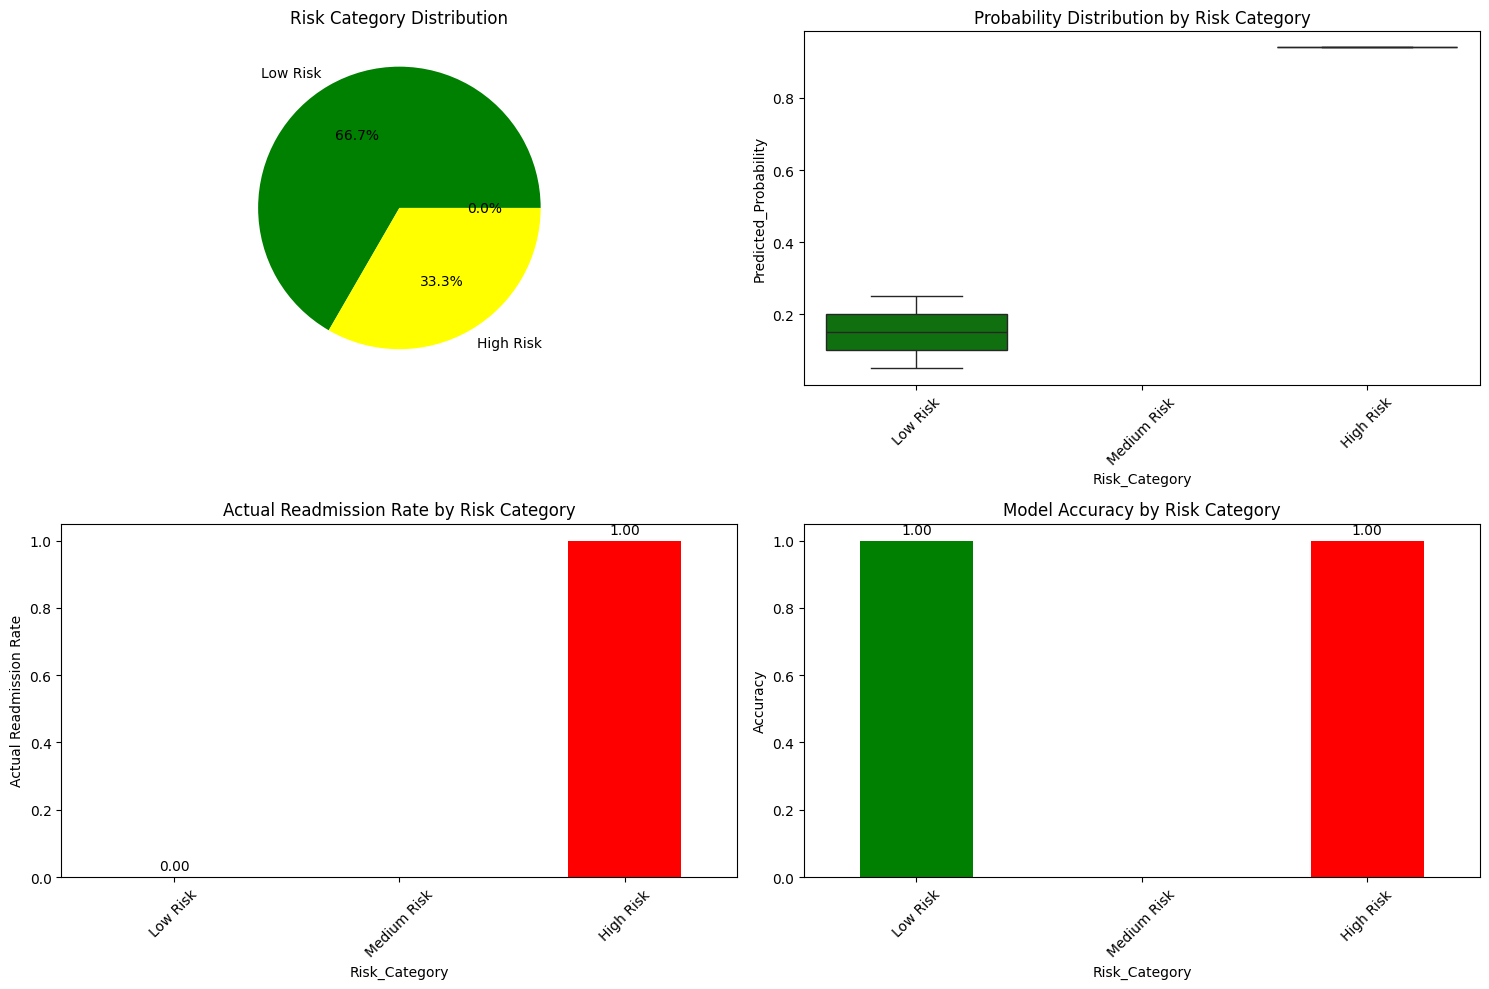

In [49]:
# Visualize risk stratification
plt.figure(figsize=(15,10))

# Risk category distribution
plt.subplot(2, 2, 1)
risk_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'yellow', 'red'])
plt.title('Risk Category Distribution')
plt.ylabel('')

# Probability distribution by risk category
plt.subplot(2, 2, 2)
sns.boxplot(x='Risk_Category', y='Predicted_Probability', data=test_results, palette=['green', 'yellow', 'red'])
plt.title('Probability Distribution by Risk Category')
plt.xticks(rotation=45)

# Actual readmission rate by risk category
plt.subplot(2, 2, 3)
actual_readmission_by_risk = test_results.groupby('Risk_Category')['Actual_Readmission'].mean()
actual_readmission_by_risk.plot(kind='bar', color=['green', 'yellow', 'red'])
plt.title('Actual Readmission Rate by Risk Category')
plt.ylabel('Actual Readmission Rate')
plt.xticks(rotation=45)

# Add value labels
for i, v in enumerate(actual_readmission_by_risk.values):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center')

# Risk category accuracy
plt.subplot(2, 2, 4)
risk_accuracy.plot(kind='bar', color=['green', 'yellow', 'red'])
plt.title('Model Accuracy by Risk Category')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)

# Add value labels
for i, v in enumerate(risk_accuracy.values):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center')

plt.tight_layout()
plt.show()
